# **Numerical Solution of the Schrödinger Equation for a One Dimensional Quantum Well**

**Authors:** Dou Du, Taylor James Baird and Giovanni Pizzi

<i class="fa fa-home fa-2x"></i><a href="../index.ipynb" style="font-size: 20px"> Go back to index</a>

**Source code:** https://github.com/osscar-org/quantum-mechanics/blob/master/notebook/quantum-mechanics/1quantumwell.ipynb

This notebook solves numerically the quantum-mechanical problem of a single rectangular one-dimensional quantum well, and displays interactively the eigenfunctions (plotted at the height of the corresponding eigenvalues).

<hr style="height:1px;border:none;color:#cccccc;background-color:#cccccc;" />

## **Goals**
* Investigate quantum confinement by manipulating the depth and width of a finite one-dimensional quantum well.
* Learn how to solve the Schrödinger equation by matrix diagonalization.
* Understand quantum tunnelling in regions where the energy is lower than the potential.

## **Background theory** 

[More on the background theory.](./theory/theory_1quantumwell.ipynb)

## **Tasks and exercises**

1. Keep the depth at the default value (-0.2) and move the slider of the width from the
smallest value (0.1) to the largest value (2.0). Do you see any change for the number
of the states? How does the eigenvalue of the ground state (the lowest eigenstate) change 
with the increasing of the width of the quantum well and why?

    <details>
    <summary style="color: red">Solution</summary>
        The wider the well potential is, the more (bound state) wavefunctions you will obtain. The reason for this can be traced back to the relationship between the eigenenergies of the bound states and the width of the well: $E_n \propto \frac{1}{L^2}$. Therefore, increasing the width of the well decreases the values of the various eigenergies. A different explanation for the decreased energy of the bound states with increasing well width can be found by appealing to Heisenberg's uncertainty principle: the less confined a particle is (and thus the less certain we are of its position), the more certain we are of its momentum. This smaller spread in momentum values translates into smaller values for the particle's kinetic energy. In addition, there are consequently more states which satisfy $ E_n < V$ (where $V$ is the well depth) and this leads to an increase in the number of bound states.  
        Note that the "zero" of the wavefunction is shifted, for every wavefunction, at the energy of the corresponding eigenvalue.
    </details>
    
2. Keep the width at the default value (1.2) and move the slider of the depth from
the smallest value (-1.0) to the largest value (0.0). Do you see any change for the 
number of the states? How does the eigenvalue of the ground state (the lowest eigenstate)
change with the increasing of the depth of the quantum well and why?

    <details>
    <summary style="color: red">Solution</summary>
        The deeper the well potential is, the more wavefunctions you will obtain. Mathematically, the explanation for this lies in the relationship between the values of the eigenergies and the potential depth. This is a transcendental relationship and has to be solved numerically or graphically but one may note that by increasing the well depth, the values of the various energy eigenvalues are increased.Some important remarks are that, regardless of the well depth, there is always at least one bound solution in one dimension and that as the depth is made progressively larger, the energy levels shall approach those of the infinite square well. For more information see 
                <a href="https://en.wikipedia.org/wiki/Finite_potential_well">Wikipedia</a>.
        Note that the "zero" of the wavefunction is shifted, for every wavefunction, 
        at the energy of the corresponding eigenvalue.
    </details>

3. Investigate the role played by quantum confinement in this 1D potential well system by varying the width of the well via the "width" slider and observing the spacing of the energy levels of the system.

    <details>
    <summary style="color: red">Solution</summary>
    
        When the dimension of the confining potential becomes comparable to the de Broglie wavelength of the confined particle then we begin to observe so-called confinement effects. These manifest as a discretization of the bound state energy levels (when the de Broglie wavelength and well width are not comparable the particle behaves essentially like a free particle, with a continuous energy spectrum). As mentioned in task 1, the relationship between the energy levels and the width of the well is $E_n \propto \frac{1}{L^2}$; consequently, as we decrease the width of the well, the spacing of the energy levels becomes larger and larger. As an application of this effect we note that in a nanostructure the effect of increased confinement (reducing the size of the structure) is to increase the band gap of that structure. This can be leveraged to manipulate the opto-electronic properties of the nanostructure. 
        Furthermore, we note that in a classical potential, the lowest energy state would be at the bottom of the well. In quantum mechanics, the lowest energy state has a higher energy 
        than the bottom of the quantum well, as you can see in the figure below. 
        The reason for this energy difference is what is typically called the quantum 
        confinement effect. Observe also how the lowest energy state changes with 
        the width of the well potential. 
    </details>
    
4. Keeping the sliders for the width and the height of the well at their default values and selecting the "Probability density" option, investigate the probability of a previously confined particle tunnelling through the potential well.

    <details>
    <summary style="color: red">Solution</summary>
       One can see that even although the potential outside the well is greater than the energy of the particle, there exists a non-zero probability of finding said particle at a position outside the well. This possibility of the particle "tunnelling" through the potential barrier in this way is a purely quantum mechanical effect. In the classical picture of this system one would never expect to observe the particle outside the confines of the potential well. 
    </details>
  
5. Please read the background theory section and try to understand the core of the
numerical algorithm. Why is the diagonalization of the Hamiltonian matrix key to 
solve the Schrödinger equation?

    <details>
    <summary style="color: red">Solution</summary>
        As shown in the background theory section, the Schrödinger equation is an 
        eigenvalue equation. In mathematics, diagonalization of the matrix allows us
        to obtain its eigenvalues and eigenfunctions. You can read more 
        about the theory on 
        <a href="https://en.wikipedia.org/wiki/Diagonalizable_matrix">Wikipedia</a>.
    </details>

<hr style="height:1px;border:none;color:#cccccc;background-color:#cccccc;" />

## **Interactive visualization**
(be patient, it might take a few seconds to load)

In [1]:
%matplotlib widget

from numpy import linspace, sqrt, ones, arange, diag, argsort, zeros
from scipy.linalg import eigh_tridiagonal
import matplotlib.pyplot as plt
from ipywidgets import FloatSlider, jslink, VBox, HBox, Button, Label, RadioButtons

In [2]:
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']
ixx = 0

def singlewell_potential(x, width, depth):
    x1 = zeros(len(x))
    for i in range(len(x)):
        if x[i] > - width/2.0 and x[i] < width/2.0:
            x1[i] = depth
    return x1
    

def diagonalization(hbar, L, N, pot=singlewell_potential, width = 0.1, depth = 0.0):
    """Calculate sorted eigenvalues and eigenfunctions by diagonalization of the Hamiltonian matrix. 

       Input:
         hbar: reduced Planck constant
         L: set discretized interval as [-L,L] 
         N: number of grid points, i.e., size of the H matrix 
         pot: python function returning the value of the potential energy
         x0: center of the quantum well
         width: the width of the quantum well
         depth: the depth of the quantum well
       Ouput:
         ew: sorted eigenvalues (array of length N)
         ef: sorted eigenfunctions, ef[:,i] (size N*N)
         x:  grid points (array of length N)
         dx: grid spacing (called Delta in the theory above)
         V:  values of the potential discretized on the grid x (array of length N)
    """
    x = linspace(-L, L, N+2)[1:N+1]                 # grid points
    dx = x[1] - x[0]                                # grid spacing
    V = pot(x, width, depth)
    z = hbar**2 /2.0/dx**2                         # coefficient

    ew, ef = eigh_tridiagonal(V+2.0*z, -z*ones(N-1))
    ew = ew.real                                    # real part of the eigenvalues
    ind = argsort(ew)                               # Indices f. sort. Array
    ew = ew[ind]                                    # Sort the ew by ind
    ef = ef[:, ind]                                 # Sort the columns 
    ef = ef/sqrt(dx)                                # Correct standardization 
    return ew, ef, x, dx, V


def plot_eigenfunctions(ax, ew, ef, x, V, width=1, Emax=0.05, fak= 5.0):
    """Create the full plot.
    
    Plot the lowest squared eigenfunctions 'ef' at the level of the eigenvalues
    'ew' in the plot area 'ax', and the potential 'V(x)'.
    """
    if psi_x.value == "Wavefunction":
        fig.suptitle('Numerical Solution ($\psi$) of One Dimension Schrödinger Equation', fontsize = 13)
    else:
        fig.suptitle('Numerical Solution ($\psi^2$) of One Dimension Schrödinger Equation', fontsize = 13)
        
    fak = fak/100.0
    
    ax[0].axhspan(0.0, Emax, facecolor='lightgrey')
    
    ax[0].set_xlim([min(x), max(x)])
    ax[0].set_ylim([min(V)-0.05, Emax])
    
    ax[0].set_xlabel(r'$x/a$', fontsize = 10)
    ax[0].set_ylabel(r'$V(x)$ and squared eigenfunctions', fontsize = 10)
    
    ax[1].set_xlim([min(x), max(x)])
    ax[1].set_ylim([min(V)-0.05, Emax])
    
    ax[1].yaxis.set_label_position("right")
    ax[1].yaxis.tick_right()
    
    ax[1].get_xaxis().set_visible(False)
    ax[1].set_ylabel(r'$\rm{\ Eigenvalues}$', fontsize = 10)
    
    indmax = sum(ew<=0.0)                       
    if not hasattr(width, "__iter__"):           
        width = width*ones(indmax)               
    for i in arange(indmax):                     
        if psi_x.value == "Wavefunction":
            ax[0].plot(x, fak*(ef[:, i])+ew[i], linewidth=width[i]+.1, color=colors[i%len(colors)])
        else:
            ax[0].plot(x, fak*abs(ef[:, i])**2+ew[i], linewidth=width[i]+.1, color=colors[i%len(colors)])

        ax[1].plot(x, x*0.0+ew[i], linewidth=width[i]+2.5, color=colors[i%len(colors)])
        
    ax[0].plot(x, V, c='k', linewidth=1.6)
    

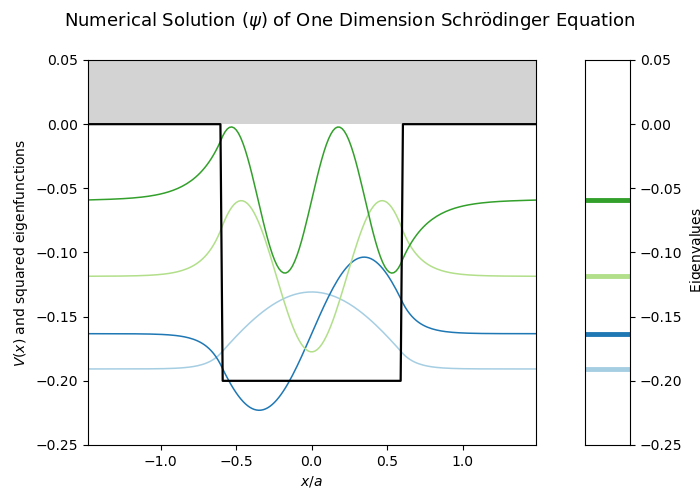

FloatSlider(value=5.0, description='Zoom factor: ', max=10.0, min=1.0, step=1.0)

In [3]:
mu = 0.06                                            # Potential parameter
L = 1.5                                              # x range [-L,L]
N = 200                                              # Number of grid points
hbar = 0.06                                          # Reduced Planck constant
sigma_x = 0.1                                        # Width of the Gaussian function
zeiten = linspace(0.0, 10.0, 400)                    # time


swidth = FloatSlider(value = 1.2, min = 0.1, max = 2.0, description = 'Width: ')
sdepth = FloatSlider(value = -0.2, min = -1.0, max = 0.0, step = 0.05, description = 'Depth: ')
sfak = FloatSlider(value = 5, min = 1.0, max = 10.0, step = 1.0, description = r'Zoom factor: ')
update = Button(description="Show all")
psi_x = RadioButtons(options=["Wavefunction", "Probability density"], value="Wavefunction", description="Show:")

width = 1.2
depth = -0.2
fak = 5.0

ew, ef, x, dx, V = diagonalization(hbar, L, N, width = width, depth = depth)
    
fig, ax = plt.subplots(1, 2, figsize=(7,5), gridspec_kw={'width_ratios': [10, 1]})
fig.canvas.header_visible = False
fig.canvas.layout.width = "750px"

fig.suptitle(r'Numerical Solution ($\psi^2$) of the Schrödinger Equation for a 1D Quantum Well', fontsize = 12)
plot_eigenfunctions(ax, ew, ef, x, V)

plt.show()

def on_update_click(b):
    for i in ax[0].lines:
        i.set_alpha(1.0)
    for i in ax[1].lines:
        i.set_alpha(1.0)
    try:
        ann.remove()
        ann1.remove()
    except:
        pass

def on_width_change(change):
    global ew, ef, x, dx, V
    ax[0].lines = []
    ax[1].lines = []
    
    try:
        ann.remove()
        ann1.remove()
    except:
        pass

    ew, ef, x, dx, V = diagonalization(hbar, L, N, width = swidth.value, depth = sdepth.value)
    plot_eigenfunctions(ax, ew, ef, x, V, fak = sfak.value)

def on_depth_change(change):
    global ew, ef, x, dx, V
    ax[0].lines = []
    ax[1].lines = []
    
    try:
        ann.remove()
        ann1.remove()
    except:
        pass

    ew, ef, x, dx, V = diagonalization(hbar, L, N, width = swidth.value, depth = sdepth.value)
    plot_eigenfunctions(ax, ew, ef, x, V, fak = sfak.value)
    
def on_xfak_change(change):
    ax[0].lines = []
    ax[1].lines = []
    
    try:
        ann.remove()
        ann1.remove()
    except:
        pass

    plot_eigenfunctions(ax, ew, ef, x, V, fak = sfak.value)

def on_press(event):
    global ann, ann1, ixx
    
    ixx = min(enumerate(ew), key = lambda x: abs(x[1]-event.ydata))[0]
    
    for i in range(len(ax[1].lines)):
        ax[0].lines[i].set_alpha(0.1)
        ax[1].lines[i].set_alpha(0.1)
        ax[0].lines[i].set_linewidth(1.1)
        
    ax[0].lines[ixx].set_alpha(1.0)
    ax[1].lines[ixx].set_alpha(1.0)
    ax[0].lines[ixx].set_linewidth(2.0)
    
    try:
        ann.remove()
        ann1.remove()
    except:
        pass
    
    ann = ax[0].annotate(s = 'n = ' + str(ixx+1), xy = (0, ew[ixx]), xytext = (-0.15, ew[ixx]), xycoords = 'data', color='k', size=15)
    ann1 = ax[1].annotate(s = str("{:.3f}".format(ew[ixx])), xy = (0, ew[ixx]), xytext = (-1.2, ew[ixx]+0.005), xycoords = 'data', color='k', size=9)

cid = fig.canvas.mpl_connect('button_press_event', on_press)

swidth.observe(on_width_change, names = 'value')
sdepth.observe(on_depth_change, names = 'value')
sfak.observe(on_xfak_change, names = 'value')
update.on_click(on_update_click)
psi_x.observe(on_width_change, names = 'value')

label1 = Label(value="(click on a state to select it)");

display(HBox([swidth, sdepth]), sfak, HBox([psi_x, update, label1]))

* **Width:** the width of the quantum well.
* **Depth:** the depth of the quantum well.
* **Zoom factor:** the zoom factor for the magnitude of the eigenfunctions.

<hr style="height:1px;border:none;color:#cccccc;background-color:#cccccc;" />

## **Legend**

(How to use the interactive visualization)

### Controls
There are three sliders you can tune interactively. Two of them can adjust 
the width and depth of the potential well. The zoom factor slider is used 
to adjust the normalization factor of the wavefunctions. This factor is used for visualization 
purposes only, to avoid overlap of the wavefunctions whilst simultaneously preventing the wavefunctions from being so narrow that you cannot appreciate their shape.

### Interactive figure
In the main visualization part, there are two subplots. The wide figure on 
the left shows the well potential and the square moduli of the eigenfunctions 
$|\psi|^2$ of different states, plotted at the energy of the corresponding 
eigenvalues. The narrow figure on the right shows the eigenvalues.
You can select either an eigenfunction or an eigenvalue by clicking on 
it in one of the two subplots. The eigenfunction and corresponding eigenvalue 
will be highlighted, and the corresponding eigenenergy and value of the index 
$n$ will be shown. All other eigenstates will fade out. By clicking the "Show all" 
button, you can reset the plot and show all states again.